In [2]:
import pandas as pd

pga=pd.read_csv('./data/pga.csv')
pga.head()

,distance,accuracy
0,290.3,59.5
1,302.1,54.7
2,287.1,62.4
3,282.7,65.4
4,299.1,52.8


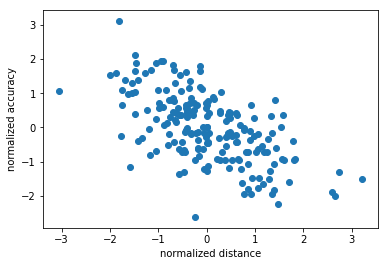

In [3]:
# Data preprocessing
# Normalize the data
pga['distance']=(pga['distance']-pga['distance'].mean())/pga['distance'].std()
pga['accuracy']=(pga['accuracy']-pga['accuracy'].mean())/pga['accuracy'].std()
pga.head()

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(pga['distance'],pga['accuracy'])
plt.xlabel('normalized distance')
plt.ylabel('normalized accuracy')
plt.show()

In [4]:
# Use linear model to model this data.
from sklearn.linear_model import LinearRegression
import numpy as np

lr=LinearRegression()
lr.fit(pga.distance[:,np.newaxis],pga['accuracy'])  # Another way is using pga[['distance']]
theta0=lr.intercept_
theta1=lr.coef_
print(theta0)
print(theta1)

1.440997464146266e-14
[-0.60759882]


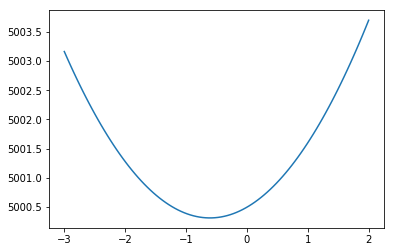

0      0.314379
1      1.693777
2     -0.059695
3     -0.574047
4      1.343083
5      1.471671
6      1.553499
7     -0.948121
8      0.022134
9     -0.340251
10     1.062527
11    -0.503908
12    -0.422079
13     0.513106
14    -0.585737
15     0.033823
16    -0.983191
17     0.478036
18     0.267620
19     0.255930
20     1.308013
21    -0.796154
22     0.852110
23    -0.012936
24    -0.574047
25    -1.158538
26    -2.000204
27    -0.281802
28     3.213453
29    -0.667566
         ...   
167    1.822365
168   -0.655876
169   -0.667566
170   -0.071385
171    0.688453
172   -0.468839
173    1.085907
174    0.384518
175    1.798985
176    0.606624
177   -0.761084
178    0.630004
179   -0.422079
180   -0.913052
181    0.618314
182   -0.422079
183   -0.655876
184   -0.819533
185    0.010444
186    0.010444
187    1.249564
188    1.401532
189    0.431277
190    0.887180
191    0.045513
192    1.191115
193   -0.188283
194   -0.270112
195   -0.083075
196   -1.462473
Name: distance, Length: 

In [5]:
#calculating cost-function for each theta1
#计算平均累积误差
def cost(x,y,theta0,theta1):
    J=0
    for i in range(len(x)):
        mse=(x[i]*theta1+theta0-y[i])**2
        J+=mse
    return J/(2*len(x))

theta0=100
theta1s = np.linspace(-3,2,100)
costs=[]
for theta1 in theta1s:
    costs.append(cost(pga['distance'],pga['accuracy'],theta0,theta1))
plt.plot(theta1s,costs)
plt.show()
print(pga.distance)


In [6]:
#调整theta
def partial_cost_theta0(x,y,theta0,theta1):
    #我们的模型时线性拟合函数：y=theta1*x + theta0，而不是sigmoid函数，当非线性时我们可以用sigmoid
    #直接多整个x series操作，省的一个一个计算，最终求sum 再平均
    h=theta1*x+theta0  
    diff=(h-y)
    partial=diff.sum()/len(diff)
    return partial
partial0=partial_cost_theta0(pga.distance,pga.accuracy,1,1)
def partial_cost_theta1(x,y,theta0,theta1):
    h=theta1*x+theta0#我们的模型时线性拟合函数：y=theta1*x + theta0，而不是sigmoid函数，当非线性时我们可以用sigmoid
    diff=(h-y)*x
    partial=diff.sum()/len(diff)
    return partial
partial1=partial_cost_theta1(pga.distance,pga.accuracy,0,5)
print(partial0)
print(partial1)

1.0000000000000104
5.5791338540719


Theta1 = -0.6046983166379609
-0.5976256382464714


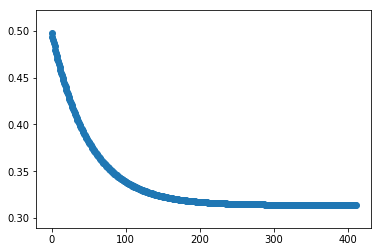

In [7]:
def gradient_descent(x,y,alpha=0.1,theta0=0,theta1=0):  #设置默认参数
    #计算成本
    #调整权值
    #计算错误代价，判断是否收敛或者达到最大迭代次数
    most_iterations=1000
    convergence_thres=0.000001 
    
    
    c=cost(x,y,theta0,theta1)
    costs=[c]
    cost_pre=c+convergence_thres+1.0
    
    counter=0
    while( (np.abs(c-cost_pre)>convergence_thres) & (counter<most_iterations) ):
        
        update0=alpha*partial_cost_theta0(x,y,theta0,theta1)
        update1=alpha*partial_cost_theta1(x,y,theta0,theta1)
        
        theta0-=update0
        theta1-=update1

        cost_pre=c
        c=cost(x,y,theta0,theta1)
        costs.append(c)
        counter+=1
    return  {'theta0': theta0, 'theta1': theta1, "costs": costs}

print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])
costs=gradient_descent(pga.distance,pga.accuracy,alpha=.01)['costs']
print(gradient_descent(pga.distance, pga.accuracy,alpha=.01)['theta1'])
plt.scatter(range(len(costs)),costs)
plt.show()

# result=gradient_descent(pga.distance, pga.accuracy,alpha=.01)
# print("Theta0 =", result['theta0'])
# print("Theta1 =",  result['theta1'])
# costs=result['costs']
# plt.scatter(range(len(costs)),costs)
# plt.show()